[View in Colaboratory](https://colab.research.google.com/github/serithemage/AWS_AI_Study/blob/master/Gluon_Crash_Course_on_Colab.ipynb)

# MXNet 초보자를 위한 Gluon 한 시간에 뽀개기

Gluon은 유연하면서 사용하기 쉬운 MXNet의 필수 API입니다. 이 과정을 통해 여러분은 Gluon의 핵심 개념을 간략하게 살펴보고 프로젝트에서 사용하는데 필요한 지식을 얻으실 수 있습니다. 이 코스는 다음과 같은 내용을 다룹니다.

- Gluon 주요 구성 요소의 사용 방법
- 간단한 신경망을 정의하고 훈련하여 이미지를 분류하는 방법

이 문서는 [Gluon Carsh Course](https://gluon-crash-course.mxnet.io/)를 한글로 번역하고 Colab에서 동작할 수 있도록 일부 내용을 추가하였습니다.

**Colab**에서 이 코드를 실행할때에는 런타임> 런타임 유형 변경> 런타임 유형: Python 3, 하드웨어 가속기: GPU로 설정해 주세요.

# 1. 서문

이 과정에서는 독자가 기계 학습 및 신경 회로망에 대한 기본 지식을 가지고 있다고 가정합니다. 신경 네트워크에 대한 높은 수준의 소개를 얻으려면 Andrew Ng의 [Coursera class on Neural Networks and Deep Learning](https://www.coursera.org/learn/neural-networks-deep-learning) 에서 기본 신경 네트워킹 지식을 습득하는 것이 좋습니다. 또한
[excellent hands-on tutorials](http://gluon.mxnet.io/) 를 참조하여 처음부터 자세히 학습하는것도 가능합니다.
한글로된 자료로는 김성훈 교수님의 [모두를 위한 머시너링/딥러닝 강의](http://hunkim.github.io/ml/)도 입문자를 위한 훌륭한 코스입니다.

이 문서의 일부분은 고급 수학을 일부 다루지만 너무 염려하지 않아도됩니다. 당신이 박사 학위가 없더라도 이 과정을 통해 아무 문제 없이 신경망과 Gluon을 사용하는 법을 배울 수 있습니다.

## 1.1. 설정

이 문서는 별도의 소프트웨어 설치 없이 바로 진행하실 수 있습니다.
만약 로컬 머신에서 이 과정을 진행하시려면 [Install a different MXNet package](https://gluon-crash-course.mxnet.io/mxnet_packages.html)를 참고하여 직접 설치하실 수도 있습니다.

또한 각 장의 내용을 설명하는 [YouTube 동영상 재생 목록](https://www.youtube.com/playlist?list=PLkEvNnRk8uVmVKRDgznk3o3LxmjFRaW7s) 도 제공합니다 . 이 동영상은 버전 [0.1](https://github.com/mli/gluon-crash-course/releases/tag/v0.1)을 기반으로 합니다. 새로운 버전은 약간 다를 수 있습니다.

## 1.2. 도움말 및 토론
도움을 받으시거나 질문을 하시려면 [MXNet 포럼](https://discuss.mxnet.io/)을 이용하십시오 .

## 1.3. 버그 신고
MXNet이나 Gluon과 관련되 버그를 신고하거나 기능을 기고하려면 [GitHub 저장소](https://github.com/mli/gluon-crash-course) 를 방문하세요.


## 1.4. 감사말

1. 이런 간단한 튜토리얼을 제공하는 아이디어는 [Pytorch](http://pytorch.org/) 에서 [가져온 것](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) 입니다.
1. 이 과정의 많은 부분은 [Deep Learning - Straight Dope](https://gluon.mxnet.io/) 에서 에서 가져왔습니다.





In [1]:
#MXNet 인스톨
!apt install libnvrtc9.1
!pip install mxnet-cu92

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libnvrtc9.1
0 upgraded, 1 newly installed, 0 to remove and 2 not upgraded.
Need to get 6,309 kB of archives.
After this operation, 25.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 libnvrtc9.1 amd64 9.1.85-3ubuntu1 [6,309 kB]
Fetched 6,309 kB in 1s (5,692 kB/s)
Selecting previously unselected package libnvrtc9.1:amd64.
(Reading database ... 22280 files and directories currently installed.)
Preparing to unpack .../libnvrtc9.1_9.1.85-3ubuntu1_amd64.deb ...
Unpacking libnvrtc9.1:amd64 (9.1.85-3ubuntu1) ...
Setting up libnvrtc9.1:amd64 (9.1.85-3ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
    100% |████████████████████████████████| 442.2MB 51kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x6dce4000 @  0x7fd0e25282a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119b

# 2. `ndarray`를 사용하여 데이터 다루기

먼저 `NDArray`데이터 저장 및 변환을위한 MXNet의 기본 도구를 소개합니다 . 이전에 `NumPy`로 작업 해본 적이 있다면 NDArray가 NumPy의 다차원 배열과 비슷하다는 것을 알 수 있습니다.

## 2.1. 시작하기

시작하려면 MXNet에서 `ndarray`패키지를 import해야 합니다.



In [0]:
from mxnet import nd

다음으로 두 개의 숫자 세트 (1, 2, 3 및 4, 5, 6)의 값을 사용하여 2D 배열 (행렬이라고도 함)을 만드는 방법을 살펴 보겠습니다.이것은 정수 튜플 (tuple of integer)의 튜플 (tuple)이라고도 합니다.

In [3]:
nd.array(((1,2,3),(5,6,7)))


[[1. 2. 3.]
 [5. 6. 7.]]
<NDArray 2x3 @cpu(0)>

같은 모양 (2 x 3 )의 1로 채워진 매우 간단한 행렬을 만들 수도 있습니다.

In [4]:
x = nd.ones((2,3))
x


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>

종종 값이 무작위로 샘플링되는 배열을 생성하고 싶은 때가 있습니다. 예를 들면 -1과 1 사이의 값을 균일하게 샘플링 하는것과 같은. 다음 코드는 무작위 샘플링을 사용하여 동일한 모양을 만듭니다.

In [5]:
y = nd.random.uniform(-1,1,(2,3))
y


[[0.09762704 0.18568921 0.43037868]
 [0.6885315  0.20552671 0.71589124]]
<NDArray 2x3 @cpu(0)>

주어진 모양의 배열을 같은 값으로 채울 수도 있습니다. 여기서는 `2.0`으로 채워보겠습니다.

In [6]:
x = nd.full((2,3), 2.0)
x


[[2. 2. 2.]
 [2. 2. 2.]]
<NDArray 2x3 @cpu(0)>

NumPy와 마찬가지로 각 NDArray의 크기는 `.shape`속성을 사용하여 액세스 할 수 있으며, `.size`속성을 사용해 NDArray 면적에 해당하는 곱을 얻을 수 도 있습니다. 또한`.dtype`은 저장된 값의 데이터 유형을 알려줍니다.

In [7]:
(x.shape, x.size, x.dtype)

((2, 3), 6, numpy.float32)

## 2.2. 연산

NDArray는 요소의 곱셈과 같은 많은 표준 수학 연산을 지원합니다:

In [8]:
x * y


[[0.19525409 0.37137842 0.86075735]
 [1.377063   0.41105342 1.4317825 ]]
<NDArray 2x3 @cpu(0)>

지수화:

In [9]:
y.exp()


[[1.1025515 1.204048  1.5378398]
 [1.9907899 1.2281718 2.0460093]]
<NDArray 2x3 @cpu(0)>

전치 행렬과의 곱을 계산하는 경우는 다음과 같습니다:

In [10]:
nd.dot(x, y.T)


[[1.4273899 3.219899 ]
 [1.4273899 3.219899 ]]
<NDArray 2x2 @cpu(0)>

## 2.3. 인덱싱

MXNet NDArrays는 여러부이 상상할 수있는 모든 형태의 다양한 슬라이싱을 지원합니다. 다음은 `y`의 `(1,)`가 반환하는 1차원 배열에서 특정 요소를 읽어오는 예제입니다 

In [11]:
y[1,2]


[0.71589124]
<NDArray 1 @cpu(0)>

`y`로부터 두 번째 및 세 번째 열을 읽어오는 경우는 다음과 같습니다:

In [12]:
y[:,1:3]


[[0.18568921 0.43037868]
 [0.20552671 0.71589124]]
<NDArray 2x2 @cpu(0)>

특정 요소에 대한 쓰기 작업이나

In [13]:
y[:,1:3] = 2
y


[[0.09762704 2.         2.        ]
 [0.6885315  2.         2.        ]]
<NDArray 2x3 @cpu(0)>

다차원 슬라이싱도 지원됩니다.

In [14]:
y[1:2,0:2] = 4
y


[[0.09762704 2.         2.        ]
 [4.         4.         2.        ]]
<NDArray 2x3 @cpu(0)>

## 2.4 MXNet NDArray와 NumPy 간의 변환

MXNet NDArray를 NumPy로 변환하거나 변환하는 것은 쉽습니다. 변환 된 배열은 메모리를 공유하지 않습니다.

In [15]:
a = x.asnumpy()
(type(a), a)

(numpy.ndarray, array([[2., 2., 2.],
        [2., 2., 2.]], dtype=float32))

In [16]:
nd.array(a)


[[2. 2. 2.]
 [2. 2. 2.]]
<NDArray 2x3 @cpu(0)>

# 3.신경망 생성

이제 Gluon에서 신경망을 만드는 방법을 살펴 보겠습니다. 또한 방금 설명한 NDArray 패키지 (`nd`)에 이어 `gluon`에서 신경망 `nn` 패키지를 가져옵니다.

In [0]:
from mxnet import nd
from mxnet.gluon import nn

## 3.1 첫 신경망 레이어 만들기

출력 단위가 2 개인 조밀한(Dense) 레이어부터 시작해 보겠습니다.



In [18]:
layer = nn.Dense(2)
layer

Dense(None -> 2, linear)

그런 다음 [−0.7,0.7] 에서 임의로 값을 끌어 오는 기본 초기화 메소드로 가중치를 초기화 합니다.

In [0]:
layer.initialize()

그런 다음 무작위 데이터로 전달합니다. 3x4 크기의 무작위 입력 x를 만들고 출력을 계산하기 위해 레이어에 넣습니다.

In [20]:
x = nd.random.uniform(-1,1,(3,4))
layer(x)


[[ 0.0009278  -0.00674768]
 [-0.02683341  0.00671751]
 [ 0.00798804  0.02131375]]
<NDArray 3x2 @cpu(0)>

보시다시피 레이어의 입력 제한을 2로 했을때 3x4 입력에 대해 출력은 3x2가 생성되었습니다. 이전에 레이어의 입력 크기를 지정하지 않았지만 (여기서 인수 in_units = 4로 지정할 수 있음) 시스템은 처음으로 데이터를 피드하는 동안 이를 자동으로 추론하고 가중치를 만들고 초기화합니다. 그래서 우리는 첫 번째 패스 이후에 가중치에 접근 할 수 있습니다 :

In [21]:
layer.weight.data()


[[-0.01631819 -0.00312688  0.0408415   0.04370362]
 [ 0.00404529 -0.0028032   0.00952624 -0.01501013]]
<NDArray 2x4 @cpu(0)>

## 3.2 신경망으로 층을 묶기

우선 신경망이 일련의 층이라는 단순한 경우를 생각해 봅시다. 정방향 패스(pass)중에 레이어를 순차적으로 하나씩 실행합니다. 다음 코드는 `nn.Sequential`을 사용해 [LeNet](http://yann.lecun.com/exdb/lenet/)이라는 유명한 네트워크를 구현하고 있습니다.

In [22]:
net = nn.Sequential()
# 일련의 레이어를 추가합니다.
net.add(
    # Dense와 마찬가지로 입력 채널을 in_channels 인수로 지정할 필요가 없습니다.
    # 이 입력은 첫 번째 전달 경로에서 자동으로 추론됩니다. 또한 출력에 relu 활성화를 적용합니다.
    #
    # 또한 튜플을 사용하여 kernel_size = (2,4)와 같이 정사각형이 아닌 커널 크기를 지정할 수 있습니다.
    nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
    # 튜플을 사용하여 비대칭 풀 및 보폭 크기를 지정할 수도 있습니다
    nn.MaxPool2D(pool_size=2, strides=2),
    nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
    nn.MaxPool2D(pool_size=2, strides=2),
    # 4-D 입력을 다음과 같은 Dense 레이어에서 사용할 수 있도록 모양이(x.shape[0], x.size/x.shape[0]) 인 2 차원으로 평평하게 만듭니다.
    nn.Flatten(),
    nn.Dense(120, activation="relu"),
    nn.Dense(84, activation="relu"),
    nn.Dense(10))
net

Sequential(
  (0): Conv2D(None -> 6, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False)
  (2): Conv2D(None -> 16, kernel_size=(3, 3), stride=(1, 1))
  (3): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False)
  (4): Flatten
  (5): Dense(None -> 120, Activation(relu))
  (6): Dense(None -> 84, Activation(relu))
  (7): Dense(None -> 10, linear)
)

`nn.Sequential`의 사용법은 `nn.Dense`와 비슷합니다. 사실, 둘 다 `nn.Block`의 하위 클래스입니다. 다음 코드는 가중치를 초기화하고 순방향 패스를 실행하는 방법을 보여줍니다.

In [23]:
net.initialize()
# Input shape is (batch_size, color_channels, height, width)
x = nd.random.uniform(shape=(4,1,28,28))
y = net(x)
y.shape

(4, 10)

'\[\]'(괄호)를 사용하여 특정 레이어의 색인을 생성 할 수 있습니다. 다음 예제는 첫 번째 레이어의 가중치와 여섯 번째 레이어의 바이어스에 액세스합니다.

In [24]:
(net[0].weight.data().shape, net[5].bias.data().shape)

((6, 1, 5, 5), (120,))

## 3.3. 유연한 신경 네트워크의 생성

`nn.Sequential`에서 MXNet은 추가 된 레이어를 순차적으로 실행하는 `forward` 함수를 자동으로 생성합니다. 이제는 유연한 전달 함수를 사용하여 네트워크를 구성하는 또 다른 방법을 소개합니다.

이를 위해 `nn.Block`의 하위 클래스를 만들고 다음의 두 가지 메서드를 구현합니다.
- `__init__`: 레이어 생성
- `forward`: forward 함수의 정의


In [25]:
class MixMLP(nn.Block):
    def __init__(self, **kwargs):
        # Run `nn.Block`'s init method
        super(MixMLP, self).__init__(**kwargs)
        self.blk = nn.Sequential()
        self.blk.add(nn.Dense(3, activation='relu'),
                     nn.Dense(4, activation='relu'))
        self.dense = nn.Dense(5)
    def forward(self, x):
        y = nd.relu(self.blk(x))
        print(y)
        return self.dense(y)

net = MixMLP()
net

MixMLP(
  (blk): Sequential(
    (0): Dense(None -> 3, Activation(relu))
    (1): Dense(None -> 4, Activation(relu))
  )
  (dense): Dense(None -> 5, linear)
)

순차적 체인 방식에서는 `nn.Block`을 기본 클래스로 사용하여 인스턴스를 추가 한 다음 순방향 패스에서 실행할 수 있습니다. 이 예에서는 `print`를 사용하여 중간 결과를 얻었고 `nd.relu`를 사용하여 `relu` 활성화를 적용했습니다. 따라서이 접근법은 전달 함수를 정의하는보다 융통성있는 방법을 제공합니다.

net의 사용법은 이전과 비슷합니다.

In [26]:
net.initialize()
x = nd.random.uniform(shape=(2,2))
net(x)


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
<NDArray 2x4 @cpu(0)>



[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
<NDArray 2x5 @cpu(0)>

마지막으로 특정 레이어의 가중치에 액세스 해 봅시다.

In [27]:
net.blk[1].weight.data()


[[-0.02634858  0.05334064  0.02748809]
 [ 0.06669661 -0.01711474  0.01647211]
 [-0.04485548  0.00594983 -0.06654498]
 [ 0.04964591 -0.06058505  0.03413684]]
<NDArray 4x3 @cpu(0)>

마지막으로 특정 레이어의 가중치에 액세스 해 봅시다.

In [28]:
net.blk[1].weight.data()


[[-0.02634858  0.05334064  0.02748809]
 [ 0.06669661 -0.01711474  0.01647211]
 [-0.04485548  0.00594983 -0.06654498]
 [ 0.04964591 -0.06058505  0.03413684]]
<NDArray 4x3 @cpu(0)>

# 4. `autograd`를 사용한 자동 분류

우리는 경험을 통해 모델을 더 좋게 훈련시킵니다. 일반적으로, 모델이 점점 좋아진다는 것은 [손실 함수](http://umbum.tistory.com/210)가 최소화되는 것을 의미합니다. 이 목표를 달성하기 위해 종종 가중치와 관련하여 손실의 기울기를 반복적으로 계산 한 다음 이에 따라 가중치를 업데이트합니다. 그래디언트 계산은 체인 규칙을 통해 간단히 수행 가능하지만 복잡한 모델의 경우 손으로 직접 작업하는 것이 쉽지 않을 수 있습니다.

모델 교육을 시작하기 전에 MXNet의 `autograd`패키지가 도함수를 자동으로 계산하여이 작업을 신속하게 처리 하는 방법을 살펴 보겠습니다 .

## 4.1. 기본 사용법

우선 `autograd`페키지를 import합시다.

In [0]:
from mxnet import nd
from mxnet import autograd

간단한 예로 매개 변수 respect에 대해  $f(x) = 2 x^2$를 구별하는 데 관심이 있다고 가정 해 봅시다.  𝑥의 초기 값을 할당함으로써 시작할 수 있습니다.

In [30]:
x = nd.array([[1, 2], [3, 4]])
x


[[1. 2.]
 [3. 4.]]
<NDArray 2x2 @cpu(0)>

$f(x)$에 대한 $x$의 기울기를 계산한 후에는 이를 저장하기 위한 저장소가 필요합니다. MXNet에서는 `attach_grad`메소드를 호출하여 NDArray에 그라데이션을 저장 할 수 있습니다.

In [0]:
x.attach_grad()

이제 우리는 $y=f(x)$함수를 정의 할 것입니다. MXNet이 $y$을 저장하게하기 위해서 나중에 그라디언트를 계산할 수 있도록 정의를 `autograd.record()`범위 안에 넣어야합니다.

In [0]:
with autograd.record():
    y = 2 * x * x

`y.backward()`.를 호출하여 역 전파 (backprop)를 호출 해 봅시다. $y$에 엔트리가 2 개 이상있는 경우, `y.backward()` 는 `y.sum().backward()`와 동일합니다.
<!-- I'm not sure what this second part really means. I don't have enough context. TMI?-->

In [0]:
y.backward()

자, 이제 예상대로 결과가 나왔는 봅시다. $y=2x^2$와 $\frac{dy}{dx} = 4x$는 [[4, 8], [12, 16]]이어야 합니다. 자동으로 계산 된 결과를 확인해 봅시다:

In [34]:
x.grad


[[ 4.  8.]
 [12. 16.]]
<NDArray 2x2 @cpu(0)>

## 4.2. 파이썬의 흐름제어 사용하기

때로는 실행이 일부 실시간 값에 의존하는 동적 프로그램을 작성하려고합니다. MXNet은 실행 추적을 기록하고 그라디언트도 계산합니다.

다음과 같은 함수`f`를 생각해 봅시다: `norm`이 1000이 될 때까지 입력을 두 배로 만듭니다. 그런 다음 요소 합계에 따라 하나의 요소를 선택합니다.

<!-- I wonder if there could be another less "mathy" demo of this -->

In [0]:
def f(a):
    b = a * 2
    while b.norm().asscalar() < 1000:
        b = b * 2
    if b.sum().asscalar() >= 0:
        c = b[0]
    else:
        c = b[1]
    return c

추적을 기록하고 임의의 값으로 피드합니다:

In [0]:
a = nd.random.uniform(shape=2)
a.attach_grad()
with autograd.record():
    c = f(a)
c.backward()

우리는 `b`가 `a`의 선형 함수이고 `c`가 `b`에서 선택된다는 것을 압니다. 그런 다음 이와 관련된 기울기는 우리가 선택한 b의 요소에 따라  `[c/a[0], 0]` 또는 `[0, c/a[1]]`가됩니다. 이제 실행 결과를 보겠습니다:

In [37]:
[a.grad, c/a]

[
 [2048.    0.]
 <NDArray 2 @cpu(0)>, 
 [2048.     724.654]
 <NDArray 2 @cpu(0)>]

# 5. 신경망의 훈련

이 섹션에서는 데이터로 이전에 정의 된 네트워크를 교육하는 방법에 대해 설명합니다. 먼저 라이브러리를 가져옵니다. 새롭게 소개할 기능들은 더 많은 가중치 초기화 를위한 `mxnet.init`, 컴퓨터 비전 데이터 세트를 읽거나 변환하기위한 `datasets` 및 `transforms`, 시각화를위한 `matplotlib`  및 벤치마킹을위한 `time`입니다.

In [0]:
# Uncomment the following line if matplotlib is not installed.
# !pip install matplotlib

from mxnet import nd, gluon, init, autograd
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
import matplotlib.pyplot as plt
from time import time

## 5.1 데이터 취득

손으로 쓴 숫자 MNIST 데이터 세트는 심층 학습에서 가장 보편적으로 사용되는 데이터 세트 중 하나입니다. 99 % 정확도를 얻는 것은 너무 간단합니다. 여기서 우리는 비슷하지만 약간 더 복잡한 FashionMNIST라는 데이터 세트를 사용합니다. 목표는 더 이상 숫자를 분류하는 것이 아니라 의류 유형을 분류하는 것입니다.

데이터 세트는 Gluon의 `data.vision.datasets` 모듈을 통해 자동으로 다운로드 할 수 있습니다. 다음 코드는 학습 데이터 집합을 다운로드하고 첫 번째 예를 보여줍니다.

In [39]:
mnist_train = datasets.FashionMNIST(train=True)
X, y = mnist_train[0]
('X shape: ', X.shape, 'X dtype', X.dtype, 'y:', y)

('X shape: ', (28, 28, 1), 'X dtype', numpy.uint8, 'y:', 2)

이 데이터 세트의 각 예제는 `(height, width, channel)` 모양 형식으로 NDArray로 표시되는 $28\times 28$ 크기의 회색 이미지입니다. 레이블은 `numpy`스칼라입니다. 

다음으로 처음 6 가지 예제를 시각화합니다.

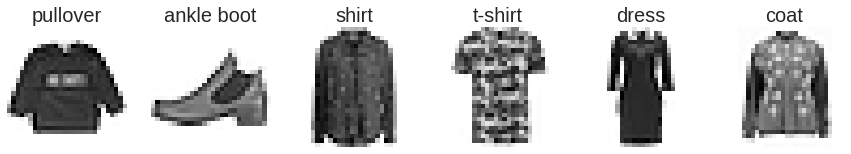

In [40]:
text_labels = [
    't-shirt', 'trouser', 'pullover', 'dress', 'coat',
    'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'
]
X, y = mnist_train[0:6]
# plot images
_, figs = plt.subplots(1, X.shape[0], figsize=(15, 15))
for f,x,yi in zip(figs, X,y):
    # 3D->2D by removing the last channel dim
    f.imshow(x.reshape((28,28)).asnumpy())
    ax = f.axes
    ax.set_title(text_labels[int(yi)])
    ax.title.set_fontsize(20)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Gluon 모델에 데이터를 입력하려면 이미지를 부동 소수점 `(channel, height, width)` 형식으로 변환해야합니다. 그것은 `transforms.ToTensor`에 의해 수행 될 수 있습니다. 또한 `transforms.Normalize`를 사용하여 모든 픽셀 값을 실수 평균 0.13 및 표준 편차 0.31로 정규화합니다. 이 두 가지 변환을 함께 연결하여 데이터 쌍의 첫 번째 요소, 즉 이미지에 적용합니다.

In [0]:
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)])

mnist_train = mnist_train.transform_first(transformer)

FashionMNIST는 `i` 번째 샘플을 얻는 방법을 정의하는 `gluon.data.Dataset`의 하위 클래스입니다. 훈련에 그것을 사용하기 위해서는 (무작위로)일련의 샘플을 얻어야합니다. 이는 `gluon.data.DataLoader`로 쉽게 수행 할 수 있습니다. 여기서 우리는 4개의 작업자(worker)를 사용하여 병렬로 데이터를 처리합니다. 병렬 처리는 매우 복잡한 데이터 변환에 대단히 유용합니다.

In [0]:
batch_size = 256

train_data = gluon.data.DataLoader(
    mnist_train, batch_size=batch_size, shuffle=True, num_workers=4)

반환 된 `train_data`는 이미지와 레이블 쌍의 일괄 처리를 생성하는 반복 가능한 객체입니다.

In [43]:
for data, label in train_data:
    print(data.shape, label.shape)
    break

(256, 1, 28, 28) (256,)


마지막으로 유효성 검사 데이터 집합 및 데이터 로더를 만듭니다.


In [44]:
mnist_valid = gluon.data.vision.FashionMNIST(train=False)
valid_data = gluon.data.DataLoader(
    mnist_valid.transform_first(transformer),
	batch_size=batch_size, num_workers=4)

## 5.2. 모델 정의

이전에 소개 된 것과 동일한 LeNet을 다시 구현합니다. 여기서 하나의 차이점은 `Xavier` 가중치 초기화 알고리즘을 deep convolutional neural network에 널리 사용되는 방법으로 변경했다는 것 입니다.

In [0]:
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Flatten(),
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))
net.initialize(init=init.Xavier())

신경망 이외에도, 우리는 훈련을위한 손실 함수와 최적화 방법을 정의 할 필요가있습니다. 분류에는 표준 softmax 교차 엔트로피 손실을 사용합니다. 먼저 예측 된 확률을 얻기 위해 출력에 softmax를 수행 한 다음 레이블을 교차 엔트로피와 비교합니다.

In [0]:
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()

선택한 최적화 방법은 표준 학습 속도가 0.1 인 표준 확률 적 기울기입니다.


In [0]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

`trainer`는 `net`의 모든 매개 변수 (가중치 및 기울기 모두)로 작성됩니다. 나중에 우리는 가중치를 업데이트하기 위해`step`메소드를 호출하면됩니다.

## 5.3. 훈련

모델 정확도를 계산하기위한 보조 함수를 만듭니다.

In [0]:
def acc(output, label):
    # output: (batch, num_output) float32 ndarray
    # label: (batch, ) int32 ndarray
    return (output.argmax(axis=1) == 
            label.astype('float32')).mean().asscalar()

이제 전체 훈련 루프를 구현해 봅시다.

In [49]:
for epoch in range(10):
    train_loss, train_acc, valid_acc = 0., 0., 0.
    tic = time()
    for data, label in train_data:
        # forward + backward
        with autograd.record():
            output = net(data)
            loss = softmax_cross_entropy(output, label)
        loss.backward()
        # update parameters
        trainer.step(batch_size)
        # calculate training metrics
        train_loss += loss.mean().asscalar()
        train_acc += acc(output, label)

    # calculate validation accuracy
    for data, label in valid_data:
        valid_acc += acc(net(data), label)

    print("Epoch %d: Loss: %.3f, Train acc %.3f, Test acc %.3f, \
Time %.1f sec" % (
        epoch, train_loss/len(train_data),
        train_acc/len(train_data),
        valid_acc/len(valid_data), time()-tic))

Epoch 0: Loss: 0.747, Train acc 0.723, Test acc 0.818, Time 24.2 sec
Epoch 1: Loss: 0.469, Train acc 0.824, Test acc 0.852, Time 24.1 sec
Epoch 2: Loss: 0.402, Train acc 0.850, Test acc 0.864, Time 23.8 sec
Epoch 3: Loss: 0.371, Train acc 0.862, Test acc 0.870, Time 23.7 sec
Epoch 4: Loss: 0.344, Train acc 0.873, Test acc 0.876, Time 23.3 sec
Epoch 5: Loss: 0.324, Train acc 0.879, Test acc 0.874, Time 23.3 sec
Epoch 6: Loss: 0.312, Train acc 0.884, Test acc 0.885, Time 23.4 sec
Epoch 7: Loss: 0.299, Train acc 0.889, Test acc 0.890, Time 23.6 sec
Epoch 8: Loss: 0.288, Train acc 0.893, Test acc 0.891, Time 23.6 sec
Epoch 9: Loss: 0.277, Train acc 0.897, Test acc 0.891, Time 23.5 sec


## 5.4. 모델 저장

마지막으로 훈련 된 매개 변수를 디스크에 저장하여 나중에 사용할 수 있습니다.

In [0]:
net.save_parameters('net.params')

# 6. 사전 훈련 된 모델로 예측하기

저장된 모델은 교육을 계속하거나 모델을 미세 조정하거나 예측을 하는 등 다양하게 사용할 수 있습니다. 이 튜토리얼에서는 사전 훈련 된 모델을 사용하여 새로운 예제를 예측하는 방법에 대해 설명합니다.

## 6.1. 전제조건

앞장의 내용을 실행하여 네트워크를 교육하고 매개 변수를 파일에 저장하십시오. 다음 단계를 실행하려면이 파일이 필요합니다.

In [0]:
from mxnet import nd
from mxnet import gluon
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
import matplotlib.pyplot as plt

먼저 간단한 모델의 정의를 복사합니다.

In [0]:
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Flatten(),
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))

5장의 마지막 섹션에서는 모든 매개 변수를 파일에 저장 했으므로 이제 다시로드 해 보겠습니다.

In [0]:
net.load_parameters('net.params')

## 6.2. 예측

교육을 위해 데이터 변환을 수행했던 것을 기억하십니까? 이제 우리는 예측을 위해서도 마찬가지로 변환을 해야 합니다.

In [0]:
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)])

이제 유효성 검사 데이터 집합의 처음 6 개 이미지를 예측하고 예측을 `preds`에 저장해 봅시다.

In [0]:
mnist_valid = datasets.FashionMNIST(train=False)
X, y = mnist_valid[:6]
preds = []  
for x in X:
    x = transformer(x).expand_dims(axis=0)
    pred = net(x).argmax(axis=1)
    preds.append(pred.astype('int32').asscalar())

마지막으로, 우리는 이미지를 시각화하고 예측값을 정답과 비교합니다.

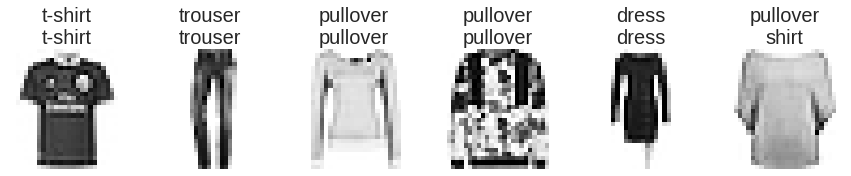

In [56]:
_, figs = plt.subplots(1, 6, figsize=(15, 15))
text_labels = [
    't-shirt', 'trouser', 'pullover', 'dress', 'coat',
    'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'
]
for f,x,yi,pyi in zip(figs, X, y, preds):
    f.imshow(x.reshape((28,28)).asnumpy())
    ax = f.axes
    ax.set_title(text_labels[yi]+'\n'+text_labels[pyi])
    ax.title.set_fontsize(20)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 6.3. Gluon model zoo의 모델로 예측하기

FashionMNIST에서 교육 된 LeNet은 시작부터 좋은 예제이지만 실제 사진을 예측하기에는 너무 간단합니다.  [Gluon model zoo](https://mxnet.incubator.apache.org/api/python/gluon/model_zoo.html)는 처음부터 대규모 모델을 교육하는 대신 여러 가지 사전 훈련 된 강력한 모델을 제공합니다. 예를 들어 ImageNet 데이터 세트에서 숙련 된 ResNet-50 V2 모델을 다운로드하여로드 할 수 있습니다.

In [57]:
from mxnet.gluon.model_zoo import vision as models
from mxnet.gluon.utils import download
from mxnet import image

net = models.resnet50_v2(pretrained=True)

다음은 각 클래스의 텍스트 레이블을 다운로드하고 로드합니다.

In [58]:
url = 'http://data.mxnet.io/models/imagenet/synset.txt'
fname = download(url)
with open(fname, 'r') as f:
    text_labels = [' '.join(l.split()[1:]) for l in f]

Wikipedia의 개 이미지를 테스트 이미지로 무작위 추출하여 다운로드하고 읽어보겠습니다.

In [59]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/\
Golden_Retriever_medium-to-light-coat.jpg/\
365px-Golden_Retriever_medium-to-light-coat.jpg'
fname = download(url)
x = image.imread(fname)

ImageNet 데이터를 사전 처리하는 일반적인 방법에 따라 :

1. 짧은 가장자리를 256 픽셀로 크기 조정하고,
2. 그런 다음 중앙 자르기를 수행하여 224x224 이미지를 얻습니다.

다음 코드에서는 MXNet [이미지 모듈](https://mxnet.incubator.apache.org/api/python/image/image.html) 에서 제공되는 이미지 처리 함수를 사용하고 있습니다.

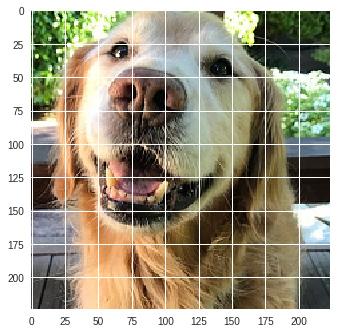

In [60]:
x = image.resize_short(x, 256)
x, _ = image.center_crop(x, (224,224))
plt.imshow(x.asnumpy())
plt.show()

이제 여러분은 이미지가 골든 리트리버임을 알 수 있습니다 (사실 이미지 URL만 봐도 알 수 있긴 합니다).

더 많은 데이터 변환은 FashionMNIST와 유사하지만 RGB 평균을 빼고 각 색상 채널을 정규화하기 위해 해당 분산으로 나누는 처리가 필요합니다.

In [0]:
def transform(data):
    data = data.transpose((2,0,1)).expand_dims(axis=0)
    rgb_mean = nd.array([0.485, 0.456, 0.406]).reshape((1,3,1,1))
    rgb_std = nd.array([0.229, 0.224, 0.225]).reshape((1,3,1,1))
    return (data.astype('float32') / 255 - rgb_mean) / rgb_std

이제 이미지의 대상을 인식 할 수 있습니다. 확률 점수를 얻기 위해 산출물에 추가 softmax를 수행합니다. 그런 다음 인식 된 상위 5 개 개체를 인쇄하십시오.

In [62]:
prob = net(transform(x)).softmax()
idx = prob.topk(k=5)[0]
for i in idx:
    i = int(i.asscalar())
    print('With prob = %.5f, it contains %s' % (
        prob[0,i].asscalar(), text_labels[i]))

With prob = 0.98323, it contains golden retriever
With prob = 0.00729, it contains English setter
With prob = 0.00297, it contains Irish setter, red setter
With prob = 0.00224, it contains cocker spaniel, English cocker spaniel, cocker
With prob = 0.00147, it contains Labrador retriever


보시다 시피 이 모델은 이미지가 골든 리트리버라고 강하게 확신하고 있습니다.

# 7. GPU 사용하기

우리는 신경망을 훈련하고 배치하기 위해 종종 GPU를 사용합니다. 왜냐하면 CPU에 비해 훨씬 더 강력한 계산 능력을 제공하기 때문입니다. 이 튜토리얼에서는 MXNet에서 GPU를 사용하는 방법을 소개합니다.

먼저, 컴퓨터에 최소한 하나의 Nvidia GPU가 있고 CUDA가 제대로 설치되어 있는지 확인하십시오. AMD 및 Intel GPU와 같은 다른 GPU는 아직 지원되지 않습니다. 그런 다음 MXNet의 GPU 지원 버전을 설치 했는지 확인하십시오 .

In [0]:
from mxnet import nd, gpu, gluon, autograd
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
from time import time

## 7.1. GPU에 데이터 할당

여러분은 MXNet의 NDArray가 Numpy와 매우 유사하다는 것을 이미 알고 있습니다. 다만 한 가지 중요한 차이점은 NDArray는 `context`속성를 사용해 배열을 어느 장치에 위치시킬지 지정할 수 있습니다. 기본적으로는 `cpu()`가 지정됩니다. 이재 우리는 장치를 첫 번째 GPU로 바꿀 것입니다. 여러분은 `gpu()`또는 `gpu(0)`가 가르키는 첫번째 GPU를 사용할 수 있습니다.

In [64]:
x = nd.ones((3,4), ctx=gpu())
x


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
<NDArray 3x4 @gpu(0)>

CPU의 경우, MXNet은 메인 메모리에 데이터를 할당하고 CPU 소켓이 둘 이상인 경우에는 가능한 모든 CPU 코어를 사용하려고 시도합니다. 여러 GPU가있는 경우 MXNet은 NDArray가 할당되는 GPU를 지정해야합니다.

적어도 하나 이상의 GPU가 있다고 가정 해 봅시다. 다른 NDArray를 만들어 거기에 지정할 수 있습니다. (하나의 GPU 만있는 경우 오류가 표시됩니다).  x에서 두 번째 GPU인 `gpu(1)`로 복사 합니다:

In [0]:
#Colab에서는 1개의 GPU만이 제공되기 때문에 이 코드는 실행할 수 없습니다.
#x.copyto(gpu(1))

MXNet은 사용자가 디바이스간에 데이터를 명시 적으로 이동시켜야합니다. 그러나  `print`, `asnumpy` 그리고  `asscalar`와 같은 연산은 암시 적으로 메인 메모리에 데이터를 이동합니다.

## 7.2. GPU에서 연산 수행

특정 GPU에서 작업을 수행하려면이 작업의 입력이 이미 해당 GPU에 있음을 보장하면됩니다. 출력은 동일한 GPU에 할당됩니다. `nd`모듈의 거의 모든 연산은 GPU에서의 실행을 지원합니다.

In [66]:
y = nd.random.uniform(shape=(3,4), ctx=gpu())
x + y


[[1.6686509 1.1740919 1.3850025 1.2467831]
 [1.3513434 1.8404298 1.6369917 1.12847  ]
 [1.1724988 1.9368206 1.5918345 1.9497097]]
<NDArray 3x4 @gpu(0)>

입력이 동일한 GPU에 없으면 오류가 표시됩니다.

## 7.3. GPU에서 신경망 실행하기

마찬가지로, GPU에서 신경망을 실행하려면 입력 데이터와 매개 변수를 GPU로 복사 혹은 이동시켜야 합니다. 이전에 정의 된 LeNet을 다시 사용합시다.

In [0]:
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=3, activation='relu'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Flatten(),
        nn.Dense(120, activation="relu"),
        nn.Dense(84, activation="relu"),
        nn.Dense(10))

저장된 매개 변수를 GPU 0에 직접로드하거나 `net.collect_params().reset_ctx`를 사용해 처리에 사용할 장치를 변경하세요.

In [0]:
net.load_parameters('net.params', ctx=gpu(0))

이제 GPU 0에 입력 데이터를 만듭니다. 그러면 전달 함수가 GPU 0에서 실행됩니다.

In [69]:
x = nd.random.uniform(shape=(1,1,28,28), ctx=gpu(0))
net(x)


[[ 0.57380724 -0.8936596   0.8549694  -0.8652749   0.1884806  -0.6512788
   1.338386   -1.0534029   0.38341144 -0.9609121 ]]
<NDArray 1x10 @gpu(0)>

## 7.4. [고급] 다중 GPU 훈련

마지막으로 데이터 병렬 처리를 통해 여러 GPU를 사용하여 신경 네트워크를 공동으로 학습하는 방법을 살펴봅시다. *n* 개의 GPU 가 있다고 가정 해 봅시다 . 각 데이터 배치를 *n* 개의 파트 로 분할 한 다음 각 GPU는 데이터의 한 부분을 사용하여 앞뒤 패스를 실행합니다.

먼저 데이터 정의와 변환 함수를 앞 장 에서 복사 해 옵시다.

In [0]:
batch_size = 256

transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.13, 0.31)])

train_data = gluon.data.DataLoader(
    datasets.FashionMNIST(train=True).transform_first(transformer),
    batch_size, shuffle=True, num_workers=4)

valid_data = gluon.data.DataLoader(
    datasets.FashionMNIST(train=False).transform_first(transformer),
    batch_size, shuffle=False, num_workers=4)


훈련 루프는 이전에 소개 한 것과 매우 유사합니다. 주요한 차이점은 코드에 직접 적어놓았습니다.

In [71]:
# 차이점 1: 트레이닝에 사용할 GPU를 지정함
# GPU가 2개일 경우
#devices = [gpu(0),gpu(1)]
# Colab에서는 GPU를 1개만 사용할 수 있기 때문에 gpu 0만 설정하였음
devices = [gpu(0)]

# 차이점 2: 매개 변수를 다시 초기화하여 여러 GPU에 설정
net.collect_params().initialize(force_reinit=True, ctx=devices)

# 손실함수와 훈련 모듈은 예전과 동일함
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

for epoch in range(10):
    train_loss = 0.
    tic = time()
    for data, label in train_data:
        # 차이점 3: 배치를 분할하여 대응 기기로 읽어들임
        data_list = gluon.utils.split_and_load(data, devices)
        label_list = gluon.utils.split_and_load(label, devices)

        # 차이점 4: 각 장치에서 정방향(forward)과 역방향(backward)으로 실행
        # MXNet는 자동으로 병렬로 실행됨
        with autograd.record():
            losses = [softmax_cross_entropy(net(X), y)
                      for X, y in zip(data_list, label_list)]
        for l in losses:
            l.backward()

        trainer.step(batch_size)

        # 차이점 5: 모든 장치의 손실 합계를 구함
        train_loss += sum([l.sum().asscalar() for l in losses])

    print("Epoch %d: Loss: %.3f, Time %.1f sec" % (
        epoch, train_loss/len(train_data)/batch_size, time()-tic))

Epoch 0: Loss: 1.869, Time 10.5 sec
Epoch 1: Loss: 0.738, Time 10.1 sec
Epoch 2: Loss: 0.546, Time 10.0 sec
Epoch 3: Loss: 0.474, Time 10.4 sec
Epoch 4: Loss: 0.434, Time 10.2 sec
Epoch 5: Loss: 0.400, Time 10.2 sec
Epoch 6: Loss: 0.376, Time 10.3 sec
Epoch 7: Loss: 0.359, Time 10.1 sec
Epoch 8: Loss: 0.347, Time 10.3 sec
Epoch 9: Loss: 0.332, Time 10.1 sec
